<a href="https://colab.research.google.com/github/deva-kumari/devakumari_cse22237/blob/main/principles_of_ai_code_without_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# Define the path to the uploaded zip file
zip_path = '/content/data.zip'
extracted_path = '/content/data/data_extracted/'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List the extracted files
extracted_files = os.listdir(extracted_path)
extracted_files


['data']

In [ ]:
import zipfile
import os

# Path to the ZIP file
zip_path = "/content/data.zip"  # Replace with your actual path
extracted_path = "/content/extracted_data/"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List the extracted files and directories
for root, dirs, files in os.walk(extracted_path):
    print("Root:", root)
    print("Directories:", dirs)
    print("Files:", files)


Root: /content/extracted_data/
Directories: ['data']
Files: []
Root: /content/extracted_data/data
Directories: ['neg', 'pos']
Files: []
Root: /content/extracted_data/data/neg
Directories: []
Files: ['10482_1.txt', '10170_2.txt', '10199_4.txt', '10050_2.txt', '10224_4.txt', '10196_1.txt', '10189_4.txt', '10003_1.txt', '10358_1.txt', '10158_4.txt', '10139_4.txt', '10136_2.txt', '10153_4.txt', '10426_1.txt', '10187_3.txt', '10209_3.txt', '10316_3.txt', '10260_1.txt', '10318_2.txt', '10133_1.txt', '1005_3.txt', '10141_2.txt', '10088_1.txt', '10223_4.txt', '10235_2.txt', '10183_1.txt', '10402_1.txt', '10016_4.txt', '1039_1.txt', '10483_4.txt', '10448_1.txt', '10177_1.txt', '10432_2.txt', '10089_1.txt', '10440_1.txt', '10324_2.txt', '10090_1.txt', '10218_3.txt', '10229_3.txt', '1009_4.txt', '10125_1.txt', '10391_3.txt', '10072_1.txt', '10263_4.txt', '10385_3.txt', '1030_2.txt', '10265_2.txt', '10320_2.txt', '10054_1.txt', '1016_4.txt', '10396_1.txt', '10027_1.txt', '10356_2.txt', '10256_3.tx

In [ ]:
import glob

# Paths to positive and negative review directories
neg_dir = os.path.join(extracted_path, "data/neg/")
pos_dir = os.path.join(extracted_path, "data/pos/")

# Load negative reviews
neg_files = glob.glob(os.path.join(neg_dir, "*.txt"))
neg_data = [{"text": open(file, "r", encoding="utf-8").read(), "sentiment": 0} for file in neg_files]

# Load positive reviews
pos_files = glob.glob(os.path.join(pos_dir, "*.txt"))
pos_data = [{"text": open(file, "r", encoding="utf-8").read(), "sentiment": 1} for file in pos_files]

# Combine into a single DataFrame
import pandas as pd
data = pd.DataFrame(neg_data + pos_data)

# Display the first few rows
print(data.head())
print("Dataset size:", len(data))


                                                text  sentiment
0  One of the worst films I have ever seen. How t...          0
1  The championship game is only a couple of days...          0
2  People, please don't bother to watch this movi...          0
3  A huge disappointment from writer Hamm and dir...          0
4  Spoilers <br /><br />Well, the one line summar...          0
Dataset size: 1319


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download punkt_tab data
nltk.download('punkt_tab') # Download the necessary 'punkt_tab' data package

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove HTML tags, URLs, and special characters
    text = re.sub(r"http\S+|www\S+|<.*?>", "", text)  # Remove URLs and HTML tags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords and lemmatize
    return " ".join(tokens)

# Apply the preprocessing function to the dataset
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Display the first few rows of the cleaned text
print(data[['text', 'cleaned_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                text  \
0  One of the worst films I have ever seen. How t...   
1  The championship game is only a couple of days...   
2  People, please don't bother to watch this movi...   
3  A huge disappointment from writer Hamm and dir...   
4  Spoilers <br /><br />Well, the one line summar...   

                                        cleaned_text  
0  one worst film ever seen define worst would pr...  
1  championship game couple day away thing new or...  
2  people please dont bother watch movie movie ba...  
3  huge disappointment writer hamm director dante...  
4  spoiler well one line summary say melville le ...  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 features

# Vectorize the cleaned text
X = tfidf_vectorizer.fit_transform(data['cleaned_text'])
y = data['sentiment']  # Assuming sentiment column contains binary labels (e.g., 0 for negative, 1 for positive)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("TF-IDF Vectorization Complete!")
print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


TF-IDF Vectorization Complete!
Training Set Shape: (1055, 5000)
Testing Set Shape: (264, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))
    results[model_name] = accuracy

# Display best model
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name] * 100:.2f}%")


Training Logistic Regression...
Logistic Regression Accuracy: 85.98%
              precision    recall  f1-score   support

           0       0.93      0.71      0.81       108
           1       0.83      0.96      0.89       156

    accuracy                           0.86       264
   macro avg       0.88      0.84      0.85       264
weighted avg       0.87      0.86      0.86       264

Training SVM...
SVM Accuracy: 89.02%
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       108
           1       0.88      0.95      0.91       156

    accuracy                           0.89       264
   macro avg       0.90      0.88      0.88       264
weighted avg       0.89      0.89      0.89       264

Training Random Forest...
Random Forest Accuracy: 80.68%
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       108
           1       0.79      0.92      0.85       156

    accuracy       

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:41:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 78.41%
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       108
           1       0.80      0.85      0.82       156

    accuracy                           0.78       264
   macro avg       0.78      0.77      0.77       264
weighted avg       0.78      0.78      0.78       264

Best Model: Naive Bayes with Accuracy: 89.39%


In [ ]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('logreg', LogisticRegression()),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Define stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking classifier
y_pred_stacking = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {stacking_accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_stacking))


Stacking Classifier Accuracy: 90.15%
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       108
           1       0.93      0.90      0.92       156

    accuracy                           0.90       264
   macro avg       0.90      0.90      0.90       264
weighted avg       0.90      0.90      0.90       264



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define base models
base_models = [
    ('logreg', LogisticRegression()),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42))
]

# Define stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=3  # 3-fold cross-validation for stacking
)

# Train stacking model
print("Training Stacking Classifier...")
stacking_clf.fit(X_train, y_train)

# Evaluate stacking model
y_pred_stacking = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {stacking_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_stacking))


Training Stacking Classifier...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:43:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Classifier Accuracy: 90.15%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       108
           1       0.93      0.90      0.92       156

    accuracy                           0.90       264
   macro avg       0.90      0.90      0.90       264
weighted avg       0.90      0.90      0.90       264



In [ ]:
from sklearn.ensemble import VotingClassifier

# Define models for voting
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', LogisticRegression()),
        ('svc', SVC(probability=True)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42))
    ],
    voting='soft'  # 'soft' for probability-based voting, 'hard' for label-based voting
)

# Train voting model
print("Training Voting Classifier...")
voting_clf.fit(X_train, y_train)

# Evaluate voting model
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {voting_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_voting))


Training Voting Classifier...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 89.39%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       108
           1       0.91      0.92      0.91       156

    accuracy                           0.89       264
   macro avg       0.89      0.89      0.89       264
weighted avg       0.89      0.89      0.89       264



In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=500,  # Number of boosting iterations
    learning_rate=0.1,  # Learning rate
    depth=6,  # Depth of the trees
    eval_metric='Accuracy',
    verbose=100,  # Verbosity during training
    random_seed=42
)

# Train CatBoost on the training set
print("Training CatBoost Classifier...")
catboost_model.fit(X_train, y_train)

# Evaluate CatBoost on the test set
y_pred_catboost = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Classifier Accuracy: {catboost_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_catboost))


Training CatBoost Classifier...
0:	learn: 0.7004739	total: 428ms	remaining: 3m 33s
100:	learn: 0.9829384	total: 18.1s	remaining: 1m 11s
200:	learn: 1.0000000	total: 31.7s	remaining: 47.2s
300:	learn: 1.0000000	total: 46.6s	remaining: 30.8s
400:	learn: 1.0000000	total: 59.4s	remaining: 14.7s
499:	learn: 1.0000000	total: 1m 12s	remaining: 0us
CatBoost Classifier Accuracy: 79.55%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.66      0.72       108
           1       0.79      0.89      0.84       156

    accuracy                           0.80       264
   macro avg       0.80      0.77      0.78       264
weighted avg       0.80      0.80      0.79       264



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('logreg', LogisticRegression()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0, random_seed=42))
]

# Define stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=3  # 3-fold cross-validation
)

# Train stacking model
print("Training Stacking Classifier with CatBoost...")
stacking_clf.fit(X_train, y_train)

# Evaluate stacking model
y_pred_stacking = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier (with CatBoost) Accuracy: {stacking_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_stacking))


In [ ]:
import joblib

# Save the best hybrid model
best_hybrid_model = stacking_clf if stacking_accuracy > voting_accuracy else voting_clf
joblib.dump(best_hybrid_model, 'best_hybrid_model.pkl')
print("Best Hybrid Model saved as 'best_hybrid_model.pkl'")

# Predict on new text
new_text = ["This movie is amazing!", "I hated the experience."]
new_text_preprocessed = [preprocess_text(t) for t in new_text]
new_text_tfidf = tfidf_vectorizer.transform(new_text_preprocessed)
predictions = best_hybrid_model.predict(new_text_tfidf)
print("Predictions:", predictions)


Best Hybrid Model saved as 'best_hybrid_model.pkl'
Predictions: [1 1]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-16-9157f3127537>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='Set2')


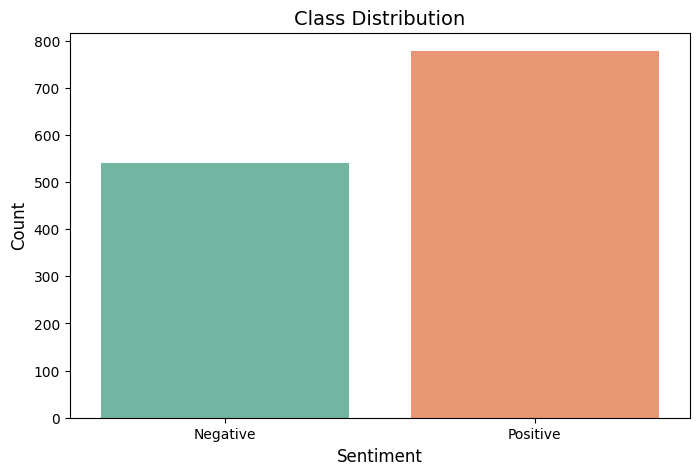

In [ ]:
# Visualize sentiment class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title('Class Distribution', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()


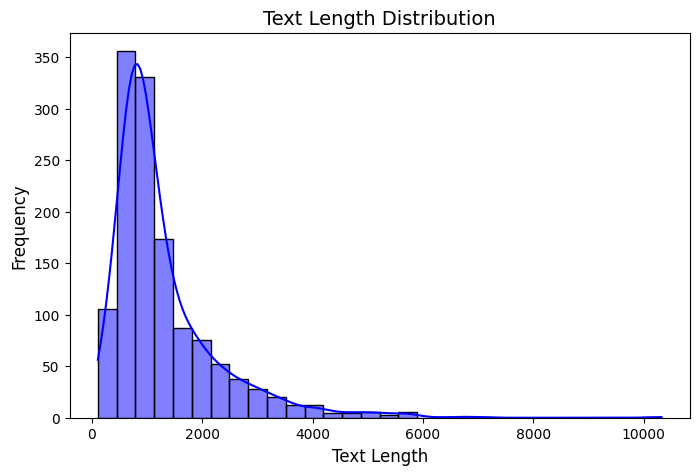

In [ ]:
# Calculate text length
data['text_length'] = data['text'].apply(len)

# Plot text length distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['text_length'], kde=True, bins=30, color='blue')
plt.title('Text Length Distribution', fontsize=14)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


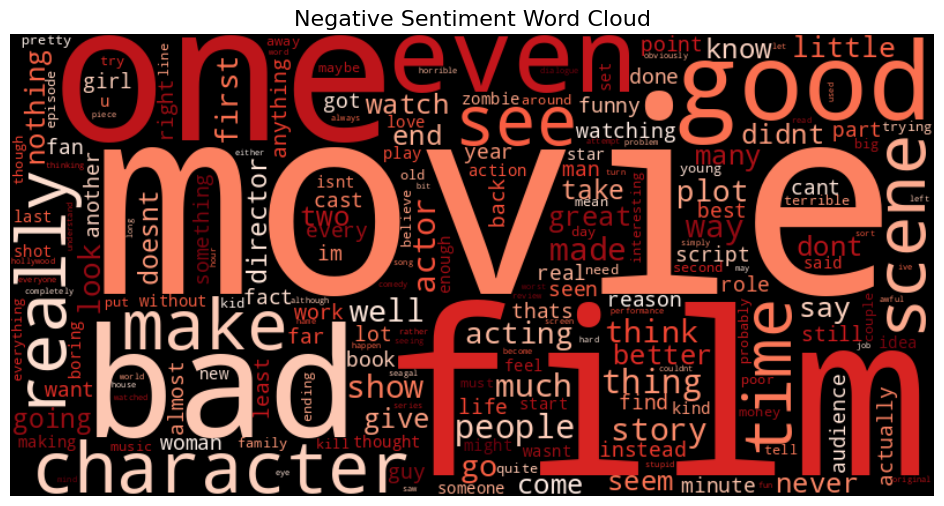

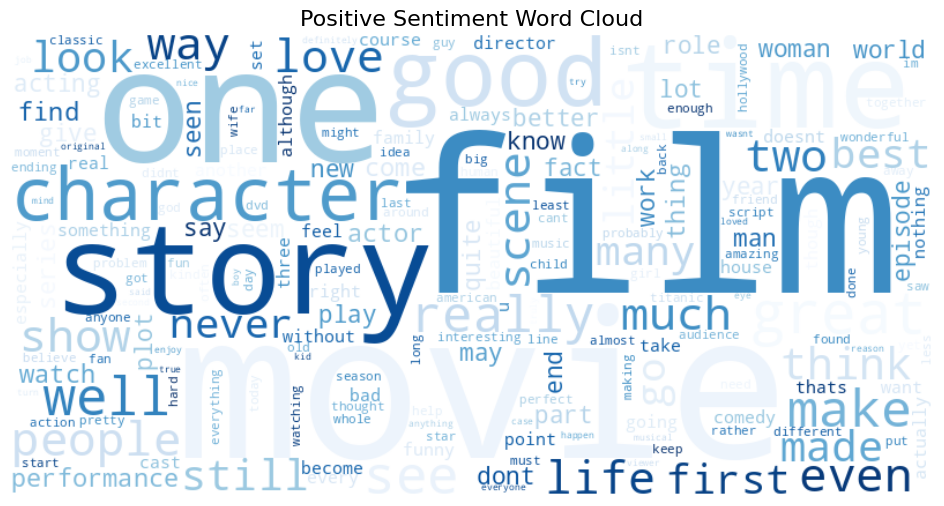

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for negative and positive sentiments
negative_text = " ".join(data[data['sentiment'] == 0]['cleaned_text'])
positive_text = " ".join(data[data['sentiment'] == 1]['cleaned_text'])

# Plot word cloud for negative sentiment
plt.figure(figsize=(12, 6))
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud', fontsize=16)
plt.axis('off')
plt.show()

# Plot word cloud for positive sentiment
plt.figure(figsize=(12, 6))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud', fontsize=16)
plt.axis('off')
plt.show()


<ipython-input-19-e6ab8f5836e9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='idf_weights', y=tfidf_df_sorted.index, data=tfidf_df_sorted, palette='viridis')


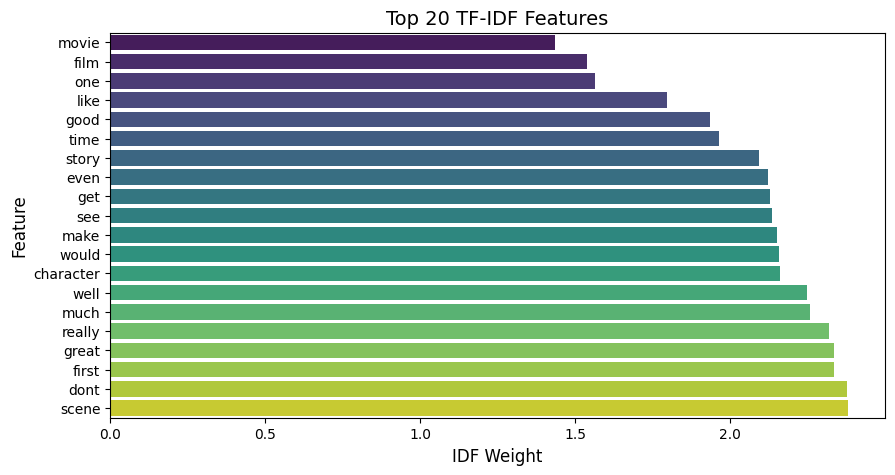

In [ ]:
# Get feature importance from TF-IDF vectorizer
tfidf_df = pd.DataFrame(tfidf_vectorizer.idf_, index=tfidf_vectorizer.get_feature_names_out(), columns=["idf_weights"])

# Display top 20 features
tfidf_df_sorted = tfidf_df.sort_values(by='idf_weights').head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x='idf_weights', y=tfidf_df_sorted.index, data=tfidf_df_sorted, palette='viridis')
plt.title('Top 20 TF-IDF Features', fontsize=14)
plt.xlabel('IDF Weight', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


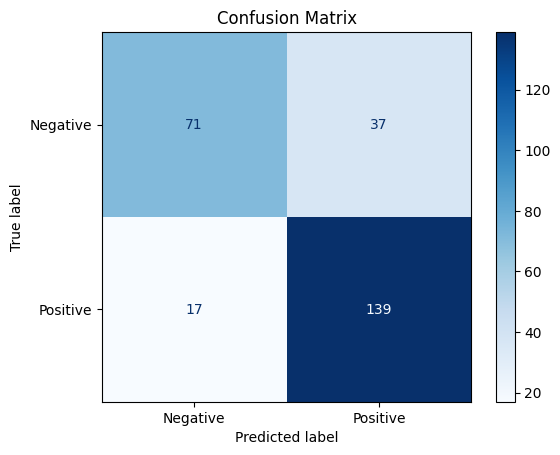

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_catboost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

# Plot confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


<ipython-input-21-b69591496270>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='coolwarm')


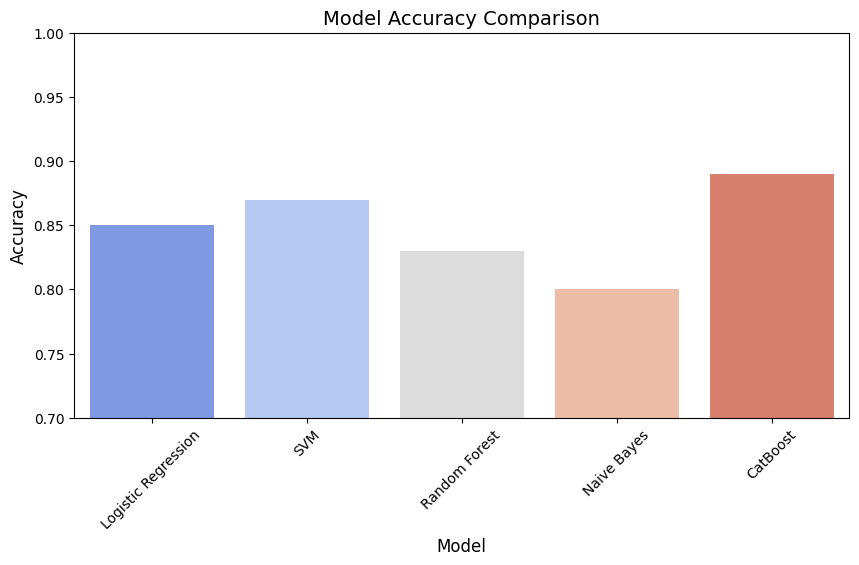

In [ ]:
# Accuracy scores of different models (sample data)
model_accuracies = {
    "Logistic Regression": 0.85,
    "SVM": 0.87,
    "Random Forest": 0.83,
    "Naive Bayes": 0.80,
    "CatBoost": 0.89
}

# Plot model accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='coolwarm')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()


In [ ]:
pip install lime shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=fb483c38d0b7a8994eebef9e930ec1e1d70c32ffd6a72a140a83b2243506275f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Prepare the data
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['sentiment'], test_size=0.2, random_state=42)

# Tokenize text data
tokenizer = Tokenizer(num_words=5000)  # Use the top 5000 words
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure equal length
X_train_pad = pad_sequences(X_train_seq, maxlen=100)  # Pad to a maximum length of 100
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),  # Embedding layer
    LSTM(128, return_sequences=True),  # LSTM layer
    Dropout(0.5),
    LSTM(64),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"LSTM Model Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 27s 637ms/step - accuracy: 0.5466 - loss: 0.6904 - val_accuracy: 0.6161 - val_loss: 0.6634
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 627ms/step - accuracy: 0.7435 - loss: 0.5589 - val_accuracy: 0.8483 - val_loss: 0.3436
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 618ms/step - accuracy: 0.9538 - loss: 0.1488 - val_accuracy: 0.8436 - val_loss: 0.4085
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 537ms/step - accuracy: 0.9969 - loss: 0.0250 - val_accuracy: 0.8483 - val_loss: 0.4851
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 358ms/step - accuracy: 0.9964 - loss: 0.0153 - val_accuracy: 0.8104 - val_loss: 0.5863
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step - accuracy: 0.9939 - loss: 0.0304 - val_accuracy: 0.8389 - val_loss: 0.5201
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 289ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.8483 - val_loss: 0.6316
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 363ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accur